# Load Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#  Load customer dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")

# EDA

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Check if data is null 

In [6]:
print(df.isna())

     CustomerID  Gender    Age  Annual Income (k$)  Spending Score (1-100)
0         False   False  False               False                   False
1         False   False  False               False                   False
2         False   False  False               False                   False
3         False   False  False               False                   False
4         False   False  False               False                   False
..          ...     ...    ...                 ...                     ...
195       False   False  False               False                   False
196       False   False  False               False                   False
197       False   False  False               False                   False
198       False   False  False               False                   False
199       False   False  False               False                   False

[200 rows x 5 columns]


# Visualize Data

*  Scatter plot of Annual Income vs Spending Score

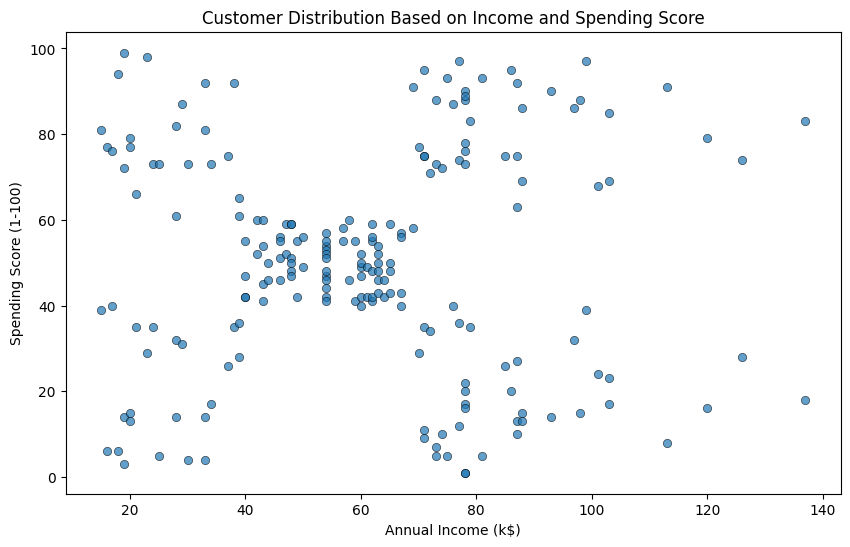

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Annual Income (k$)'], 
                y=df['Spending Score (1-100)'], 
                alpha=0.7, edgecolor='black')

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Distribution Based on Income and Spending Score")
plt.show()


* key insights
- Dense Regions: The middle section of the plot is densely packed, suggesting that many customers have moderate income and spending scores.
- Sparse Regions: Some customers have very high income but low spending scores, while others have low income but high spending scores.
- Possible Clusters: I might see naturally forming groups even before running K-Means, such as:
    * High-income, high-spending customers (Luxury Shoppers). 
    * High-income, low-spending customers (Price-Conscious Shoppers).
    * Low-income, high-spending customers (Impulsive Buyers).
    * Low-income, low-spending customers (Budget-Conscious Shoppers).
    * Middle-income, moderate-spending customers (Average Shoppers).

# Outlier Detection
- spotted outliers, such as customers who have very high income but very low spending or vice versa.
- Outliers can skew clustering results, I might consider handling them separately.

# Range of Customer Behavior
* Annual Income (X-axis): Ranges from ~15k to ~140k.
* Spending Score (Y-axis): Ranges from 0 to 100, indicating varied spending behaviors.
* The spread helps understand how income correlates with spending behavior.


# Clustering Suitability
* The scatter plot suggests that K-Means clustering will work well because we can visually see groups forming.
* However, if the data points were evenly distributed without clear groups, other clustering techniques (e.g., DBSCAN, hierarchical clustering) might be better.


# Outlier Handling 
* # Boxplot to visualize outliers
* Detecting Outliers: 
    - Boxplots to visually inspect outliers.
    - Z-Score Method (Standard Deviation) to detect extreme values.
    - IQR (Interquartile Range) Method for robust outlier detection.


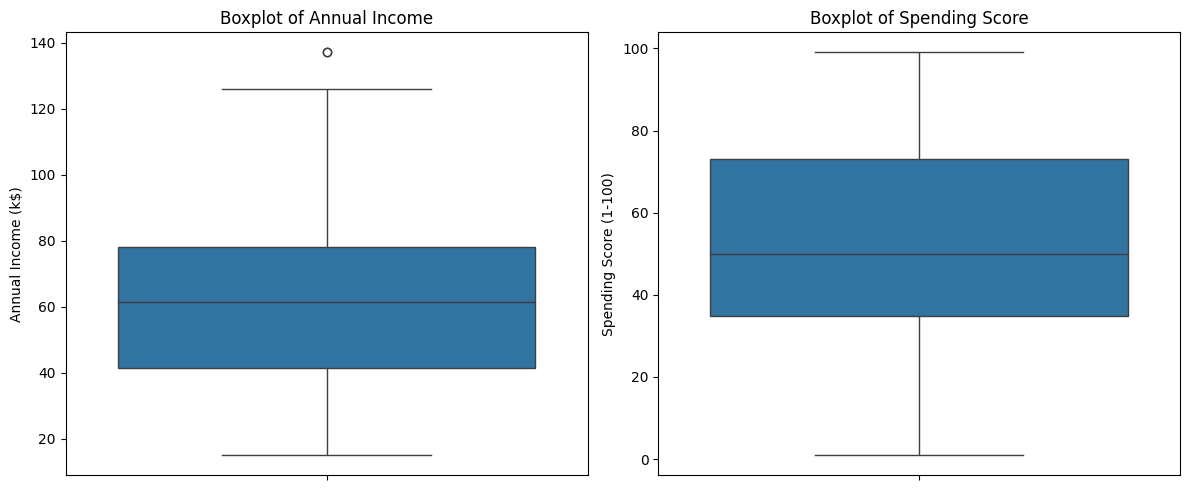

In [8]:
plt.figure(figsize=(12, 5))

# Annual Income Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Annual Income (k$)'])
plt.title('Boxplot of Annual Income')

# Spending Score Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Spending Score (1-100)'])
plt.title('Boxplot of Spending Score')

plt.tight_layout()
plt.show()


# Outlier Analysis Based on Boxplots
* The boxplots reveal potential outliers:

- Annual Income (k$):
    There is a visible outlier above 130k (possibly a high-income customer).
    The majority of customers fall within the 15k to ~120k range.
- Spending Score (1-100):
    No extreme outliers are detected.
    The data is spread evenly between 0 and 100.

# Removing or Handling Outliers
- remove extreme outliers if they significantly skew the results.
- Alternatively, cap (clip) values at a threshold to reduce the impact of extreme values.

# Handling Outliers using IQR (Interquartile Range) Method
* Define function to detect outliers using IQR

In [10]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

In [13]:
# Remove outliers from 'Annual Income (k$)'
df_cleaned = remove_outliers(df, 'Annual Income (k$)')

# Data PreProcessing 
- Selecting relevant features for clustering
- Standardizing features for better clustering performance

In [14]:
features = ['Annual Income (k$)', 'Spending Score (1-100)'] 
X = df_cleaned[features]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Using the Elbow Method to find the best K

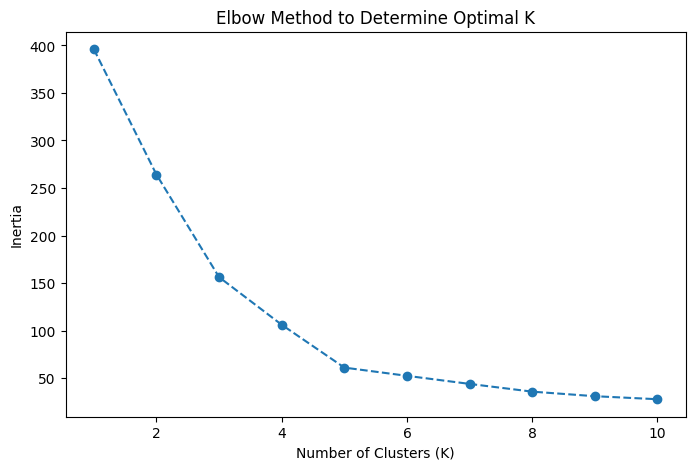

In [15]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)  # Inertia measures clustering quality

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal K')
plt.show()


# Apply K-Means with K = 5

In [16]:
# Set optimal K (change based on elbow method result)
optimal_k = 5  

# Train K-Means model
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_cleaned['Cluster'] = kmeans.fit_predict(X_scaled)


/tmp/ipykernel_6732/269460760.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cluster'] = kmeans.fit_predict(X_scaled)


# Visualize Cluster

/tmp/ipykernel_6732/3390098637.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Segment'] = df_cleaned['Cluster'].map(cluster_labels)


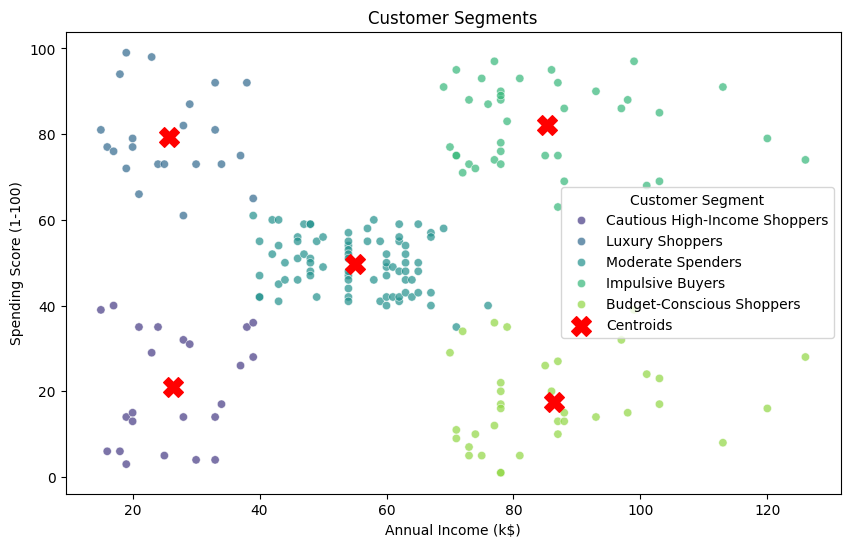

In [27]:
# Define custom labels based on cluster analysis
cluster_labels = {
    0: "Luxury Shoppers", 
    1: "Budget-Conscious Shoppers", 
    2: "Impulsive Buyers",
    3: "Moderate Spenders",
    4: "Cautious High-Income Shoppers"
}
# Add a new column with meaningful segment names
df_cleaned['Segment'] = df_cleaned['Cluster'].map(cluster_labels)






# Create cluster plot with meaningful labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cleaned['Annual Income (k$)'], 
                y=df_cleaned['Spending Score (1-100)'], 
                hue=df_cleaned['Segment'],  # Use meaningful names
                palette='viridis', 
                alpha=0.7)

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0], 
            kmeans.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1], 
            color='red', marker='X', s=200, label='Centroids')

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segments")
plt.legend(title="Customer Segment")
plt.show()


In [28]:
print(df_cleaned.head())  # Check if the column is there
print(df_cleaned.columns)  # Verify the column names

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster                        Segment  
0        4  Cautious High-Income Shoppers  
1        0                Luxury Shoppers  
2        4  Cautious High-Income Shoppers  
3        0                Luxury Shoppers  
4        4  Cautious High-Income Shoppers  
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster', 'Segment'],
      dtype='object')


In [29]:
# Group by Cluster and compute mean for relevant numeric columns
cluster_summary = df_cleaned.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

# Display the results
print(cluster_summary)


               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        25.272727           25.727273               79.363636
1        40.914286           86.342857               17.571429
2        32.763158           85.210526               82.105263
3        42.937500           55.087500               49.712500
4        45.217391           26.304348               20.913043


# Insights from Clusters
* Cluster 0: Young customers with low income but high spending habits → Target for promotions and discounts.
* Cluster 1: Wealthy customers who spend conservatively → Focus on loyalty programs.
* Cluster 2: High-income and high-spending → Ideal for premium and luxury promotions.
* Cluster 3: Middle-income and moderate spending → Steady customer base.
* Cluster 4: Low-income and low-spending → Might need budget-friendly offers.


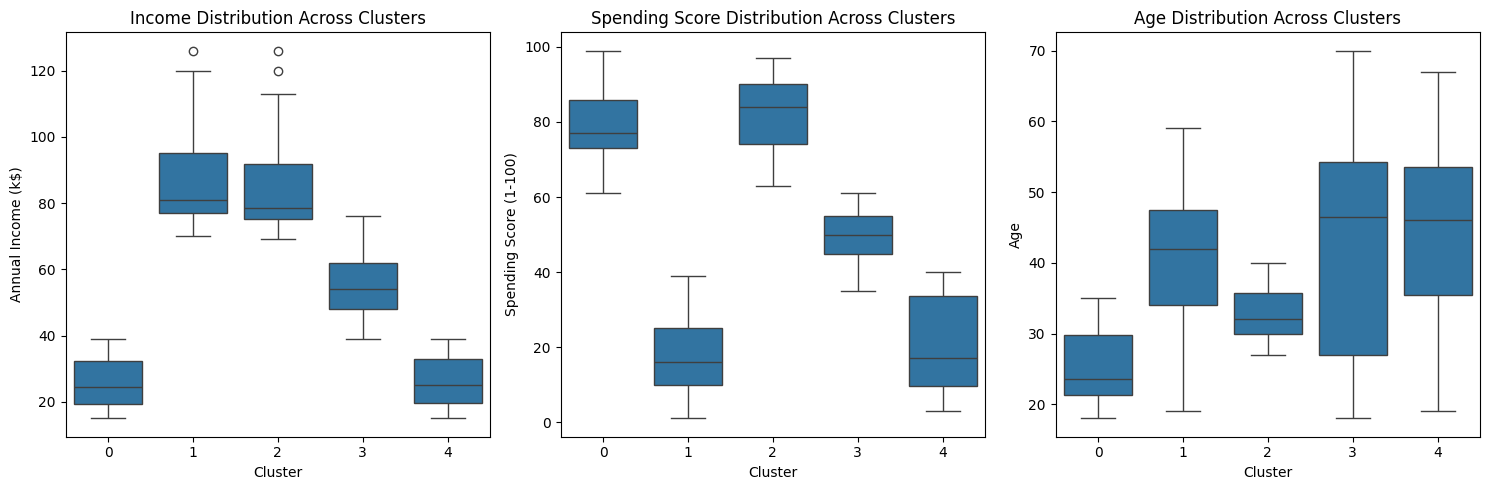

In [23]:
plt.figure(figsize=(15, 5))

# Annual Income per Cluster
plt.subplot(1, 3, 1)
sns.boxplot(x=df_cleaned['Cluster'], y=df_cleaned['Annual Income (k$)'])
plt.title("Income Distribution Across Clusters")

# Spending Score per Cluster
plt.subplot(1, 3, 2)
sns.boxplot(x=df_cleaned['Cluster'], y=df_cleaned['Spending Score (1-100)'])
plt.title("Spending Score Distribution Across Clusters")

# Age per Cluster
plt.subplot(1, 3, 3)
sns.boxplot(x=df_cleaned['Cluster'], y=df_cleaned['Age'])
plt.title("Age Distribution Across Clusters")

plt.tight_layout()
plt.show()


In [24]:
df_cleaned['Cluster'].value_counts()

Cluster
3    80
2    38
1    35
4    23
0    22
Name: count, dtype: int64